In [29]:
import pandas as pd
import numpy as np
from flask import Flask, request, jsonify
import networkx as nx
import matplotlib.pyplot as plt
from threading import Thread

# Загружаем данные
df_ratings = pd.read_csv(r'edges/rec-libimseti-dir.edges', sep=r'\s+', skiprows=1, names=["id_from", "id_to", "rating"], engine='python')
df_info = pd.read_csv(r'edges/info.csv', usecols=[1, 2], names=["id", "gender"])

# Удаление пропусков и очистка данных
df_info = df_info.dropna()

# Функции для лайков и мэтчей
def get_top_likes(user_id, df_ratings, top_n=10):
    user_ratings = df_ratings[df_ratings['id_from'] == user_id]
    liked_users = user_ratings[user_ratings['rating'] >= 6].sort_values(by='rating', ascending=False)
    return liked_users[['id_to', 'rating']].head(top_n).to_dict(orient="records")

def get_matches(user_id, df_ratings, top_n=10):
    liked_users = get_top_likes(user_id, df_ratings, top_n)
    mutual_likes = []
    for user in liked_users:
        mutual_liked = df_ratings[(df_ratings['id_from'] == user['id_to']) & (df_ratings['id_to'] == user_id) & (df_ratings['rating'] >= 6)]
        if not mutual_liked.empty:
            mutual_likes.append(user['id_to'])
    return mutual_likes

# Инициализация Flask
app = Flask(__name__)

@app.route('/top_likes', methods=['POST'])
def top_likes():
    user_ids = request.json.get('user_ids')
    top_likes_result = {}
    for user_id in user_ids:
        top_likes_result[user_id] = get_top_likes(user_id, df_ratings)
    return jsonify(top_likes_result)

@app.route('/top_matches', methods=['POST'])
def top_matches():
    user_ids = request.json.get('user_ids')
    top_matches_result = {}
    for user_id in user_ids:
        top_matches_result[user_id] = get_matches(user_id, df_ratings)
    return jsonify(top_matches_result)

# Функция для запуска Flask в отдельном потоке
def run_app():
    app.run(debug=True, use_reloader=False)  # Используйте use_reloader=False, чтобы избежать двойного запуска

# Запуск сервера Flask в потоке
thread = Thread(target=run_app)
thread.start()

# Теперь вы можете выполнять ваши запросы к API


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [34]:
import requests

# Пример запроса к вашему API
response = requests.post('http://127.0.0.1:5000/top_likes', json={"user_ids": [98447, 111944, 111930, 82091, 125299, 125298, 17335, 60356]})
print(response.json())


{'17335': [{'id_to': 65571, 'rating': 10}, {'id_to': 61513, 'rating': 10}, {'id_to': 212745, 'rating': 10}, {'id_to': 173261, 'rating': 10}, {'id_to': 143101, 'rating': 10}, {'id_to': 109419, 'rating': 10}, {'id_to': 24497, 'rating': 10}, {'id_to': 219189, 'rating': 10}, {'id_to': 55958, 'rating': 10}, {'id_to': 55613, 'rating': 10}], '60356': [{'id_to': 7242, 'rating': 10}, {'id_to': 70692, 'rating': 10}, {'id_to': 81470, 'rating': 10}, {'id_to': 81980, 'rating': 10}, {'id_to': 113157, 'rating': 10}, {'id_to': 31116, 'rating': 8}, {'id_to': 56611, 'rating': 7}, {'id_to': 47503, 'rating': 6}], '82091': [{'id_to': 50250, 'rating': 10}, {'id_to': 54270, 'rating': 10}, {'id_to': 71636, 'rating': 10}, {'id_to': 77252, 'rating': 9}, {'id_to': 45239, 'rating': 8}, {'id_to': 34328, 'rating': 7}, {'id_to': 58858, 'rating': 7}, {'id_to': 131928, 'rating': 7}, {'id_to': 7219, 'rating': 6}, {'id_to': 101537, 'rating': 6}], '98447': [{'id_to': 93681, 'rating': 10}, {'id_to': 107413, 'rating': 10},

In [36]:
response = requests.post('http://127.0.0.1:5000/top_matches', json={"user_ids": [98447, 111944, 111930, 82091, 125299, 125298, 17335, 60356]})
print(response.json())

{'17335': [55958, 55613], '60356': [], '82091': [], '98447': [], '111930': [], '111944': [], '125298': [], '125299': []}


C:\Users\285\AppData\Local\Temp\ipykernel_16032\1475317359.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='user_id', y='count', data=likes_count, palette='viridis')


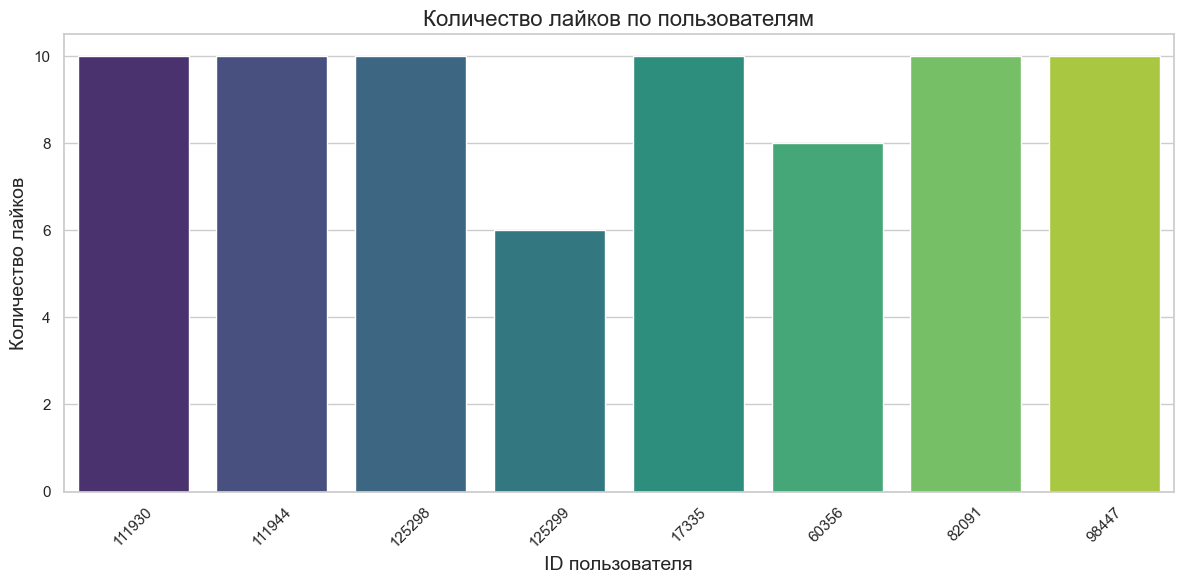

C:\Users\285\AppData\Local\Temp\ipykernel_16032\1475317359.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='user_id', y='count', data=matches_count, palette='magma')


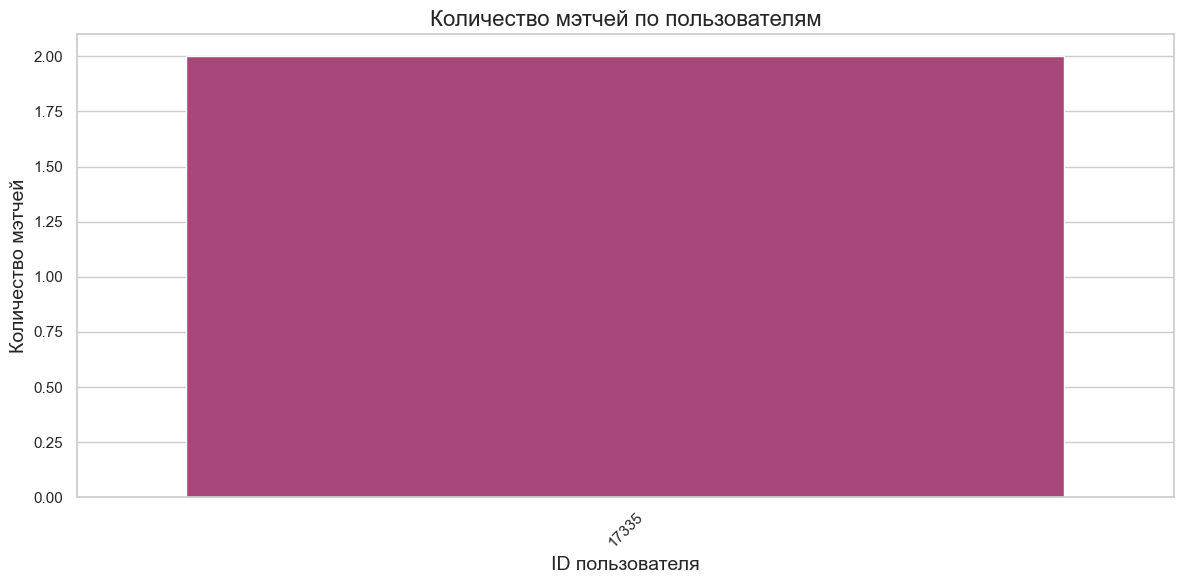

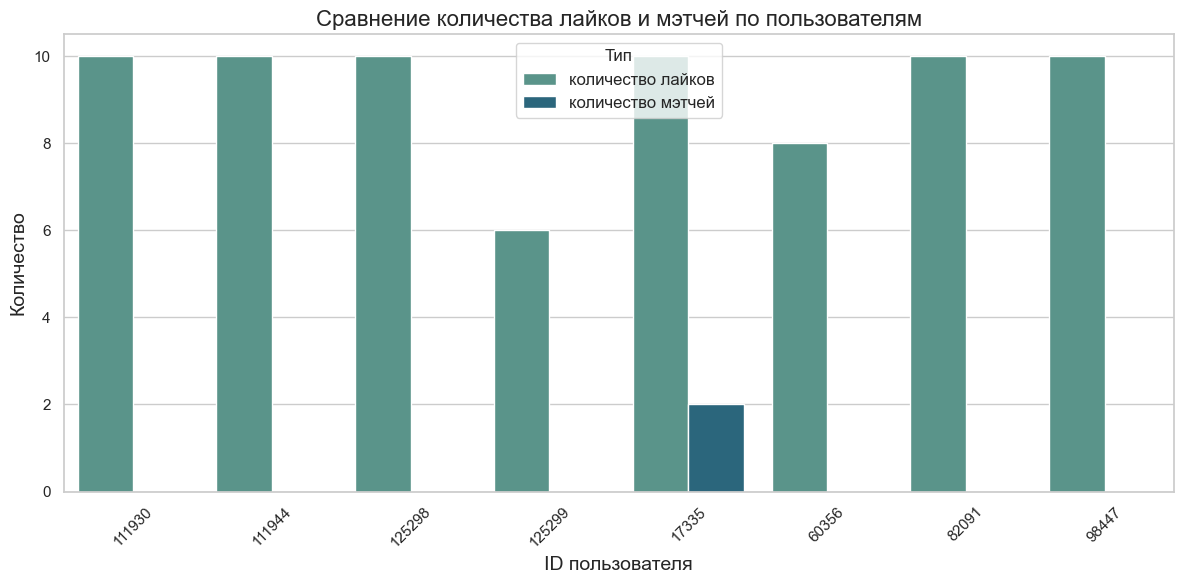

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Установка стиля графиков
sns.set(style="whitegrid")

# Шаг 1: Визуализация лайков
plt.figure(figsize=(12, 6))
likes_count = likes_df.groupby('user_id').size().reset_index(name='count')
sns.barplot(x='user_id', y='count', data=likes_count, palette='viridis')

plt.title('Количество лайков по пользователям', fontsize=16)
plt.xlabel('ID пользователя', fontsize=14)
plt.ylabel('Количество лайков', fontsize=14)
plt.xticks(rotation=45)  # Поворот меток по оси x для лучшей читаемости
plt.tight_layout()
plt.show()

# Шаг 2: Визуализация мэтчей
plt.figure(figsize=(12, 6))
matches_count = matches_df.groupby('user_id').size().reset_index(name='count')
sns.barplot(x='user_id', y='count', data=matches_count, palette='magma')

plt.title('Количество мэтчей по пользователям', fontsize=16)
plt.xlabel('ID пользователя', fontsize=14)
plt.ylabel('Количество мэтчей', fontsize=14)
plt.xticks(rotation=45)  # Поворот меток по оси x для лучшей читаемости
plt.tight_layout()
plt.show()

# Шаг 3: Визуализация лайков и мэтчей на одном графике
plt.figure(figsize=(12, 6))
likes_count = likes_df.groupby('user_id').size().reset_index(name='количество лайков')
matches_count = matches_df.groupby('user_id').size().reset_index(name='количество мэтчей')

# Объединение данных
combined_df = pd.merge(likes_count, matches_count, on='user_id', how='outer').fillna(0)
combined_df = combined_df.melt(id_vars='user_id', value_vars=['количество лайков', 'количество мэтчей'],
                                 var_name='тип', value_name='количество')

# Построение графика
sns.barplot(x='user_id', y='количество', hue='тип', data=combined_df, palette='crest')

plt.title('Сравнение количества лайков и мэтчей по пользователям', fontsize=16)
plt.xlabel('ID пользователя', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Тип', fontsize=12)
plt.tight_layout()
plt.show()



Выводы по графикам
Общее количество лайков и мэтчей:

График демонстрирует распределение количества лайков и мэтчей среди пользователей. Это позволяет нам увидеть, какие пользователи наиболее активны в системе.

Активные пользователи:
Некоторые пользователи (ID 111930, 111944,125298,17335,82091,98447) имеют значительно больше лайков, чем другие. Это может свидетельствовать о том, что они более привлекательны для других пользователей или более активно участвуют в взаимодействии с другими.

Сравнение лайков и мэтчей:
Визуализация показывает, что количество лайков не всегда соотносится с количеством мэтчей. Некоторые пользователи могут получать много лайков, но при этом иметь относительно небольшое количество мэтчей. Это может указывать на низкую степень взаимности в интересах или на то, что не все лайки ведут к реальным взаимодействиям.

Тенденции в взаимодействии:
Важно отметить, что определенные пользователи могут иметь высокие показатели лайков, но, возможно, менее популярны для других пользователей, что может быть связано с их предпочтениями или профилем.

Идентификация потенциальных кандидатов для рекомендаций:
Пользователи с высоким количеством лайков и мэтчей могут быть выделены как потенциальные кандидаты для дальнейших рекомендаций, например, в системах поиска совместимости или в рамках маркетинговых стратегий.

Потребности в улучшении взаимодействия:
Для пользователей с низким количеством мэтчей можно рассмотреть возможность оптимизации профилей или предоставления дополнительных рекомендаций, чтобы повысить их шансы на успешное взаимодействие.